In [3]:
import random
from copy import deepcopy
import matplotlib.pyplot as plt

class Card():
    
    #Create the instance variables suit and value
    def __init__(self, value, suit):                          
        self.value = value
        self.suit = suit
        
    #print card names with special cases for cards with unique names in prügl   
    def __str__(self):                                        
        if self.value==1:
            return str(self.suit) + ' es'
        
        if self.value==11:
            if self.suit=='Spar':
                return 'Spar Mogens'
            else:
                return str(self.suit) + ' knægt'
            
        if self.value==12:
            if self.suit=='Ruder': 
                return 'Ruder Helge'
            else:
                return str(self.suit) + ' Dame'
        
        if self.value==13:
            return str(self.suit) + ' konge'   
        
        if self.value=='J': #The suit of the Joker is not shown
            return 'Joker'
        
        return str(self.suit) + ' ' + str(self.value)
    
    
    def color(self):                                    
        #all cards with suits other than hearts or diamonds will return black
        #This is important as it prevents the jokers from being given to other players
        if self.suit=='Hjerter' or self.suit=='Ruder':
            return 'r'
        return 'b'
    
class Deck():

    #Create the deck
    def __init__(self):
        self.cards = []
        self.construct()
        
    #method for populating the deck
    def construct(self):
        for s in ['Klør', 'Hjerter', 'Spar', 'Ruder']:
            for v in range(1,14):
                self.cards.append(Card(v, s))
        self.cards.extend([Card('J', None)]*3)
        
    #Function for showing the whole deck, mainly used fro troubleshooting
    def show_deck(self):
        for card in self.cards:
            print(card)
    
    #Does what it says on the tin
    def shuffle(self):
        random.shuffle(self.cards)
        
    #draw a card with pop(), put it among the drawn cards, and return it.   
    def draw(self):
        return self.cards.pop()
    
    #return the remaining number of cards
    
    def __len__(self):
        return len(self.cards)
        

In [5]:

def winning(L): 
    #check for win by number or sum
    if len(L)==5 or sum(L)==25:
        return True
    
    #check for win with an ace with avlue 14
    if sum(L)==12:
        if 1 in L:            
            return True
    
    #If no other statements returned anything the player does not win
    return False


#function for see how trashy a players cards, which is the average for noneempty hands
def trashscore(L):
    #make sure we dont divide by zero, and set trash score for empty hand
    if L==[]:
        return 5
    
    return sum(L)/len(L)

0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
9.061489
3.455806
1.132045


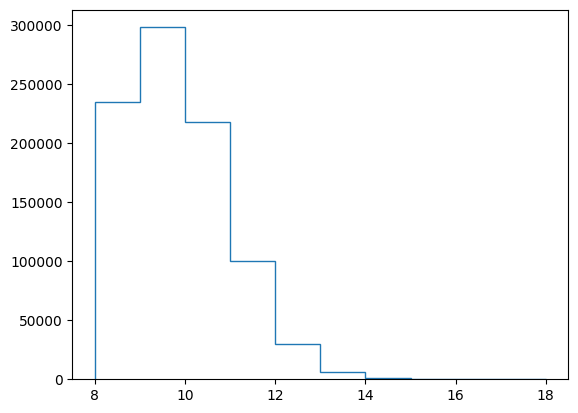

In [4]:
#Egoprügl
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins1=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        '''
        #code for manually inputing every card
        v=input('what is the cards value? ')
        s=input('what is the cards suit? ')
        
        try: 
            v=int(v)
        except:
            1
        card=Card(v,s)
        '''
        
        #draw a card
        card=L.draw()
        
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #make sure the player can take the card
        if sum(Gamestate[player])+card.value<=25:
            Gamestate[player].append(card.value)
            
        #check for win by number of cards
        if len(Gamestate[player])==5:
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check for win by sum including an ace with value 14
        if sum(Gamestate[player])==12:
            if 1 in Gamestate[player]:            
                Gamestate[player]=[]
                wins[player]+=1
                continue
        #check for win by sum
        if sum(Gamestate[player])==25:
            Gamestate[player]=[]
            wins[player]+=1
        
    totalwins1.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        
#plt.figure('egoprügl')
plt.hist(totalwins1,bins=10,range=(8,18),histtype='step')

print(sum(totalwins1)/len(totalwins1))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))

In [7]:
#Gentleman
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins2=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        #draw a card
        card=L.draw()
       
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win
                if winning(Gamestate[player]):
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
            continue
        
        #If we are still in the loop, the card is red
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
            winning(Gamestate[player]+[card.value])):
                
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #See if any player can take the card, and if true give it to them
        #Starting with the player who has to wait the longest for his next turn
        for i in range(n):
            player=(turn-i-1)%n
            
            if sum(Gamestate[player])+card.value<25:
                Gamestate[player].append(card.value)
                
                breaker=True
                break
            
        if breaker:
            continue
        
    totalwins2.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        

plt.hist(totalwins2,bins=10,range=(8,18),histtype='step')

print(sum(totalwins2)/len(totalwins2))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))
        


0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%


In [ ]:
#Med skrald
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins3=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        #draw a card
        card=L.draw()
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
    
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win, then discard their hand
                if winning(Gamestate[player]):
    
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
    
            continue
        
        #If we are still in the loop, the card is red
        
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
                winning(Gamestate[player]+[card.value])):
    
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #if there were no immediate winners find the best player on which to build trash
        
        skraldidx = max([
            (-trashscore(hand), #Choose whoever has lowest trash score
             len(hand),         #if tie occurs who has most cards
             (idx-player)%n,    #Pick player who has to wait longest for their next turn
             idx) for (idx,hand) in enumerate(Gamestate)])[3]
    
        #Give the player the card, if the player would still be a good trash.
        if trashscore(Gamestate[skraldidx]+[card.value])<=5 and card.value<10:
            Gamestate[skraldidx].append(card.value)
    
            continue
        
        #See if any player can take the card, and if true give it to them
        #Starting with the player who has to wait the longest for his next turn
        for i in range(n):
            player=(turn-i-1)%n
            
            if sum(Gamestate[player])+card.value<25 and player!=skraldidx:
                Gamestate[player].append(card.value)
    
                
                breaker=True
                break
            
        if breaker:
            continue
            
        #if No one else could take the card, give it to the designated trash
        if sum(Gamestate[skraldidx])+card.value<=25:
    
            Gamestate[skraldidx].append(card.value)
            continue
    
    totalwins3.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        

#plt.figure('medskrald')
plt.hist(totalwins3,bins=10,range=(8,18),histtype='step')

print(sum(totalwins3)/len(totalwins3))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))



In [ ]:
#Lavesthånd
n=4    #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins4=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        #draw a card
        card=L.draw()
        
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win, then discard their hand
                if winning(Gamestate[player]):
                    
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
            continue
        
        #If we are still in the loop, the card is red
        
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
                winning(Gamestate[player]+[card.value])):
                
                
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #if there were no immediate winners find the best player on which to build trash
        
        skraldidx = max([
            (-trashscore(hand), #Choose whoever has lowest trash score
             len(hand),         #if tie occurs who has most cards
             (idx-player)%n,    #Pick player who has to wait longest for their next turn
             idx) for (idx,hand) in enumerate(Gamestate)])[3]
    
        #Give the player the card, if the player would still be a good trash.
        if trashscore(Gamestate[skraldidx]+[card.value])<=5:
            Gamestate[skraldidx].append(card.value)
            
            continue
    
        #Make a list of all players who can take the card, and are not designated trash
        validplayers = [x for x in range(n) 
                        if sum(Gamestate[x])+card.value<25 and x!=skraldidx ]
        
        
        #sort valid player by hand size
        validplayers=sorted(validplayers, key=lambda x: sum(Gamestate[x]))
        
        
        for i in validplayers:
            
            
            #if sum(Gamestate[i])+card.value<25 and player!=skraldidx:
                Gamestate[i].append(card.value)
                
                breaker=True
                break
            
        if breaker:
            continue
        
        if sum(Gamestate[skraldidx])+card.value<=25:
            
            Gamestate[skraldidx].append(card.value)
            continue
    
    
    
    
    
    
    totalwins4.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        
#plt.figure('giv til lav hånd')
plt.hist(totalwins4,bins=10,range=(8,18),histtype='step')

print(sum(totalwins4)/len(totalwins4))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))

In [ ]:
#nodupes
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins5=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        
        #draw a card
        card=L.draw()
        
        #print(Gamestate)
        #print(card)
        
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win, then discard their hand
                if winning(Gamestate[player]):
                    
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
            continue
        
        #If we are still in the loop, the card is red
        
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
                winning(Gamestate[player]+[card.value])):
                
                
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #if there were no immediate winners find the best player on which to build trash
        
        skraldidx = max([
            (-trashscore(hand), #Choose whoever has lowest trash score
             len(hand),         #if tie occurs who has most cards
             (idx-player)%n,    #Pick player who has to wait longest for their next turn
             idx) for (idx,hand) in enumerate(Gamestate)])[3]
    
        
        #Give the player the card, if the player would still be a good trash.
        if trashscore(Gamestate[skraldidx]+[card.value])<=5 and card.value<10:
            Gamestate[skraldidx].append(card.value)
    
            continue
        
        #Make a list of all players who can take the card, and are not designated trash
        validplayers = [x for x in range(n) 
                        if sum(Gamestate[x])+card.value<25 and x!=skraldidx ]
        
        
        #sort valid player by hand size
        validplayers=sorted(validplayers, key=lambda x: sum(Gamestate[x]))
        
        
        for i in validplayers:
            
            Gamestate[i].append(card.value)
            
            #find all none zero sums
            sums=[sum(x) for x in Gamestate if x]
                
            #check if two players have the same hand sum, and if so, 
            #remove the card and try the next player
            if len(sums) != len(set(sums)):
                
                Gamestate[i]=Gamestate[i][:-1]
                #print('how')
                continue
            
            
            breaker=True
            break
            
        if breaker:
            continue
        
        
        #if duplicates are unavoidable, give the card to whoever has the lowest sum
        if validplayers:
            Gamestate[validplayers[0]].append(card.value)
            continue
        
        
        
        if sum(Gamestate[skraldidx])+card.value<=25:
            
            Gamestate[skraldidx].append(card.value)
            continue
    
    
    totalwins5.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))    
    
   
  
    
    

        
import matplotlib.pyplot as plt
#plt.figure('nodupes')
plt.hist(totalwins5,bins=10,range=(8,18),histtype='step')

print(sum(totalwins5)/len(totalwins5))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))

In [ ]:
#winnablehands
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins6=[]
heldig=[]
uheldig=[]


for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        #draw a card
        card=L.draw()
        
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win, then discard their hand
                if winning(Gamestate[player]):
                    
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
            continue
        
        #If we are still in the loop, the card is red
        
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
                winning(Gamestate[player]+[card.value])):
                
                
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #if there were no immediate winners find the best player on which to build trash
        
        skraldidx = max([
            (-trashscore(hand), #Choose whoever has lowest trash score
             len(hand),         #if tie occurs who has most cards
             (idx-player)%n,    #Pick player who has to wait longest for their next turn
             idx) for (idx,hand) in enumerate(Gamestate)])[3]
        
        #Give the player the card, if the player would still be a good trash.
        if trashscore(Gamestate[skraldidx]+[card.value])<=5 and card.value<10:
            Gamestate[skraldidx].append(card.value)
    
            continue
        
        
        #Make a list of all players who can take the card, and are not designated trash
        validplayers = [x for x in range(n) 
                        if sum(Gamestate[x])+card.value<25 and x!=skraldidx ]
        
        
        #sort valid player by hand size
        validplayers=sorted(validplayers, key=lambda x: sum(Gamestate[x]))
        
        
        for i in validplayers:
            
            #Check if giving the player the card would put them in a state, 
            #where the only need one additional card to win
            #If they have an ace they can already win with one card
            if (sum(Gamestate[i])+card.value>10 
                and sum(Gamestate[i])<11
                and 1 not in Gamestate[i]):
                
                Gamestate[i].append(card.value)
                breaker=True
                break
               
        if breaker:
            continue
    
    
        #if there were no player who would have a good hand after getting the card
        if validplayers:
            Gamestate[validplayers[0]].append(card.value)
            continue
                
        
        #if No one else could take the card, give it to the designated trash
        if sum(Gamestate[skraldidx])+card.value<=25:
            Gamestate[skraldidx].append(card.value)
            continue
    
    
    totalwins6.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        
import matplotlib.pyplot as plt
#plt.figure()
plt.hist(totalwins6,bins=10,range=(8,18),histtype='step')

print(sum(totalwins6)/len(totalwins6))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))

In [ ]:
#alle regler
n=4     #number of players

#create a deck
thedeck=Deck()
#[thedeck.construct() for x in range(9)] #extension of the program to play megaprügl

totalwins7=[]
heldig=[]
uheldig=[]

for i in range(1000000):  
    
    if not i%50000:
        print(str(i//10000)+'%')
    
    #create a list of hands
    Gamestate=[[] for x in range(n)] 
    
    #shuffle the deck
    L=deepcopy(thedeck)
    L.shuffle()
    
    turns=len(L)
    
    #creates a list of wins for each palyer
    wins=[0]*n
    

    #Loop that plays the game
    for turn in range(turns):
        player=turn%n  
        
        #draw a card
        card=L.draw()
        
    
        #check for Mogens and Helge
        if (card.value==11 and card.suit=='Spar' 
        or card.value==12 and card.suit=='Ruder'):        
            
            wins[player]+=1
            continue
        
        #check for jokers
        if card.value=='J':
            Gamestate[player]=[]
            wins[player]+=1
            continue
        
        #check if card is black 
        if card.color()=='b':
            
            #check if the player can take the card
            if sum(Gamestate[player])+card.value<=25:
                Gamestate[player].append(card.value)
                
                #check if this card made the player win, then discard their hand
                if winning(Gamestate[player]):
                    
                    Gamestate[player]=[]
                    wins[player]+=1 
                continue 
            
            continue
        
        #If we are still in the loop, the card is red
        
        
        #See if any player can win with the card, and if true let them.
        
        breaker=False #bool to break out of the nested loop
        for i in range(n):
            player=(turn+i+1)%n
            
            if (sum(Gamestate[player])+card.value<=25 and 
                winning(Gamestate[player]+[card.value])):
                
                
                Gamestate[player]=[]
                wins[player]+=1
                
                breaker=True
                break
            
        if breaker:
            continue
        
        #if there were no immediate winners find the best player on which to build trash
        
        skraldidx = max([
            (-trashscore(hand), #Choose whoever has lowest trash score
             len(hand),         #if tie occurs who has most cards
             (idx-player)%n,    #Pick player who has to wait longest for their next turn
             idx) for (idx,hand) in enumerate(Gamestate)])[3]
        
        #Give the player the card, if the player would still be a good trash.
        if trashscore(Gamestate[skraldidx]+[card.value])<=5 and card.value<10:
            Gamestate[skraldidx].append(card.value)
    
            continue
        
        
        #Make a list of all players who can take the card, and are not designated trash
        validplayers = [x for x in range(n) 
                        if sum(Gamestate[x])+card.value<25 and x!=skraldidx ]
        
        
        #sort valid player by hand size
        validplayers=sorted(validplayers, key=lambda x: sum(Gamestate[x]))
        
        
        #make a list of players who would have a good hand after recieving the card
        goodplayers=[]
        for i in validplayers:
            
            #Check if giving the player the card would put them in a state, 
            #where the only need one additional card to win
            #If they have an ace they can already win with one card
            if (sum(Gamestate[i])+card.value>10 
                and sum(Gamestate[i])<11
                and 1 not in Gamestate[i]):
                
                goodplayers.append(i)
                Gamestate[i].append(card.value)
                
                sums=[sum(x) for x in Gamestate]
                
                #check if two players have the same hand sum, and if so, 
                #remove the card and try the next player
                if len(sums) != len(set(sums)):
                    
                    Gamestate[i]=Gamestate[i][:-1]
                    continue
                
                breaker=True
                break

              
        if breaker:
            continue

            
        #if all good players would result in a duplicate
        if goodplayers:
            Gamestate[goodplayers[0]].append(card.value)
            continue
    
    
        #if there were no player who would have a good hand after getting the card
        if validplayers:
            Gamestate[validplayers[0]].append(card.value)
            continue
                
        
        #if No one else could take the card, give it to the designated trash
        if sum(Gamestate[skraldidx])+card.value<=25:
            Gamestate[skraldidx].append(card.value)
            continue
    
    
    totalwins7.append(sum(wins))
    heldig.append(max(wins))
    uheldig.append(min(wins))
        

plt.hist(totalwins7,bins=10,range=(8,18),histtype='step')

print(sum(totalwins7)/len(totalwins7))
print(sum(heldig)/len(heldig))
print(sum(uheldig)/len(uheldig))

In [ ]:
def average(list_of_values):
    sum(list_of_values) / len(list_of_values)


import numpy as np

print([average(L) for L in (totalwins1,totalwins2,totalwins3,totalwins4,totalwins5,totalwins6,totalwins7)])

for i in (totalwins1,totalwins2,totalwins3,totalwins4,totalwins7):
    
    plt.plot(range(5,19),np.histogram(i,bins=range(5,20))[0]/10000,'.-')

plt.legend(['Egocentric Prügl','With Gentleman rule','With Trash','Give to lowest','With advanced rules'],loc='upper right')
   


#plt.savefig('E.png',bbox_inches='tight')